 # **Recommendation on Smart Phones**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [3]:
pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 4.8 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619411 sha256=6b887b8f5660cd2acc7b624e646fdf80200a36f2abe7cf710d0ec336cddec92f
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [4]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Loading Data files
rev1 = pd.read_csv('../content/drive/MyDrive/phone_user_review_file_1.csv', encoding='iso-8859-1')  

## Data Analysis and Preparing

In [6]:
len(rev1)

374910

In [7]:
rev1.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/
date,5/2/2017,4/28/2017,5/4/2017,5/2/2017,5/11/2017
lang,en,en,en,en,en
country,us,us,us,us,us
source,Verizon Wireless,Phone Arena,Amazon,Samsung,Verizon Wireless
domain,verizonwireless.com,phonearena.com,amazon.com,samsung.com,verizonwireless.com
score,10,10,6,9.2,4
score_max,10,10,10,10,10
extract,As a diehard Samsung fan who has had every Sam...,Love the phone. the phone is sleek and smooth ...,Adequate feel. Nice heft. Processor's still sl...,Never disappointed. One of the reasons I've be...,I've now found that i'm in a group of people t...
author,CarolAnn35,james0923,R. Craig,Buster2020,S Ate Mine


In [8]:
rev_copy = rev1.copy()

In [10]:
#Checking training dataset attributes datatypes 
rev1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374910 entries, 0 to 374909
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   phone_url  374910 non-null  object 
 1   date       374910 non-null  object 
 2   lang       374910 non-null  object 
 3   country    374910 non-null  object 
 4   source     374910 non-null  object 
 5   domain     374910 non-null  object 
 6   score      366691 non-null  float64
 7   score_max  366691 non-null  float64
 8   extract    371934 non-null  object 
 9   author     371641 non-null  object 
 10  product    374910 non-null  object 
dtypes: float64(2), object(9)
memory usage: 31.5+ MB


In [11]:
# Check  the shape of the data-frame.
rev1.shape

(374910, 11)

In [12]:
rev1.describe()

,score,score_max
count,366691.000000,366691.0
mean,8.461821,10.0
std,2.402519,0.0
min,1.000000,10.0
25%,8.000000,10.0
50%,10.000000,10.0
75%,10.000000,10.0
max,10.000000,10.0


In [13]:
#check for missing values
rev1.isnull().values.any() 

True

In [14]:
null_counts = rev1.isnull().sum()  # This prints the columns with the number of null values they have
print (null_counts)

phone_url       0
date            0
lang            0
country         0
source          0
domain          0
score        8219
score_max    8219
extract      2976
author       3269
product         0
dtype: int64


In [16]:
# filling the null values in column 'score' and 'score_max' 
rev_f = rev1.fillna(rev1.median())

# dropping the null values in columns 'extract' ,'author' and 'product'
rev_f = rev1.dropna()

In [17]:
popular_products = pd.DataFrame(rev1.groupby('product')['score'].count())
most_popular = popular_products.sort_values('score', ascending=False)
most_popular.head(10)

,score
product,
"OnePlus 3 (Graphite, 64 GB)",4103
"OnePlus 3 (Soft Gold, 64 GB)",3563
Huawei P8lite zwart / 16 GB,2707
Samsung Galaxy S6 zwart / 32 GB,2345
"OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)",1883
Samsung Galaxy J3 (8GB),1848
Samsung Galaxy S7 edge 32GB (Verizon),1811
Samsung Galaxy S7 edge 32GB (T-Mobile),1729
"Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]",1720


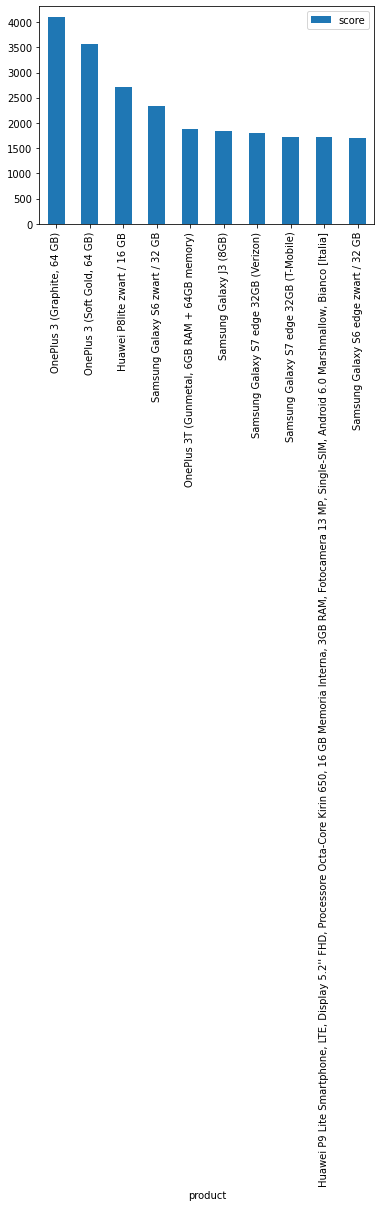

In [18]:
most_popular.head(10).plot(kind = "bar")

In [19]:
# Round oﬀ scores to the nearest integers. 
rev_f['score'] = rev_f['score'].astype(int) 
rev_f['score_max'] = rev_f['score_max'].astype(int) 

In [20]:
rev_f.shape

(360802, 11)

In [21]:
# Check for duplicate values and remove them if there is any. 
rev_d = rev_f.drop_duplicates()

In [22]:
#  Drop irrelevant features.  
rev_d.drop(['phone_url','date','lang','country','source','domain','score_max','extract'], axis = 1, inplace = True)

In [23]:
rev_vs = rev_d.copy()

In [56]:
rev_d.shape

(359654, 3)

In [57]:
# Keep only 359654 data samples.  
df = rev_d.sample(n=359654)

In [55]:
#  Identify the most rated features.
#sorting on products that got highest mean score
df.groupby('product')['score'].mean().sort_values(ascending=False).head()  

product
ÙØ§ÙØ§ÙÙ P9 Ø¨ÙÙØ³ - 64 Ø¬ÙØ¬Ø§Ø¨Ø§ÙØªØ ÙÙØ± Ø¬Ù Ø§Ù ØªÙ Ø§ÙØ ÙØ§Ù ÙØ§ÙØ Ø°ÙØ¨Ù                                  10.0
Nokia Lumia 735 - 8 GB - GrÃ¼n                                                                                                          10.0
Nokia Lumia 735 - Smartphone libre Windows Phone (pantalla 4.7", cÃ¡mara 6.7 Mp, 8 GB, Quad-Core 1.2 GHz, 1 GB RAM), gris               10.0
Nokia Lumia 735 - Smartphone libre Windows Phone (pantalla de 4.7", cÃ¡mara 6.7 Mp, 8 GB, 1.2 GHz, 1 GB de RAM), naranja (importado)    10.0
Nokia Lumia 735 Mobiltelefon                                                                                                            10.0
Name: score, dtype: float64

In [58]:
#  Identify the users with most number of reviews. 
(df['author'].value_counts()).head()

Amazon Customer    32475
Cliente Amazon     13221
Client d'Amazon     5455
e-bit               5157
Amazon Kunde        2718
Name: author, dtype: int64

In [29]:
# The product that got most number of reviews.
df['product'].value_counts().head()

OnePlus 3 (Graphite, 64 GB)                     4103
OnePlus 3 (Soft Gold, 64 GB)                    3557
Huawei P8lite zwart / 16 GB                     2707
Samsung Galaxy S6 zwart / 32 GB                 2342
OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)    1883
Name: product, dtype: int64

In [30]:
# extracting authors who gave greater than 50 ratings
df1 = pd.DataFrame(columns=['author', 'a_count'])
df1['author']=df['author'].value_counts().index.tolist() 
df1['a_count'] = list(df['author'].value_counts() > 50)

In [31]:
# get names of indexes for which count column value is False
index_names = df1[ df1['a_count'] == False ].index 
# drop these row indexes from dataFrame 
df1.drop(index_names, inplace = True) 
df1

,author,a_count
0,Amazon Customer,True
1,Cliente Amazon,True
2,Client d'Amazon,True
3,e-bit,True
4,Amazon Kunde,True
...,...,...
183,Andrew,True
184,Alejandro,True
185,Cristina,True
186,Client Amazon,True


In [32]:
# extracting product that got more than 50 ratings
df2 = pd.DataFrame(columns=['product', 'p_count'])
df2['product']=df['product'].value_counts().index.tolist() 
df2['p_count'] = list(df['product'].value_counts() > 50)

In [33]:
# get names of indexes for which count column value is False
index_names = df2[ df2['p_count'] == False ].index 
# drop these row indexes from dataFrame 
df2.drop(index_names, inplace = True)

In [34]:
df2

,product,p_count
0,"OnePlus 3 (Graphite, 64 GB)",True
1,"OnePlus 3 (Soft Gold, 64 GB)",True
2,Huawei P8lite zwart / 16 GB,True
3,Samsung Galaxy S6 zwart / 32 GB,True
4,"OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)",True
...,...,...
1419,Oukitel K10000 Smartphone 10000mAh 4G 5.5polli...,True
1420,"Samsung J510 Galaxy J Smartphone da 16GB, Marc...",True
1421,"Samsung Galaxy J7 Prime (32GB) G610F/DS - 5.5""...",True
1422,"Huawei Honor 5X unlocked smartphone, 16GB Dayb...",True


In [35]:
# selecting data rows where product is having more than 50 ratings.  
df3 = df[df['product'].isin(df2['product'])] 
df3

,score,author,product
0,10,CarolAnn35,Samsung Galaxy S8
1,10,james0923,Samsung Galaxy S8
4,4,S Ate Mine,Samsung Galaxy S8
5,10,BDB76,Samsung Galaxy S8
6,4,KLC30306,Samsung Galaxy S8
...,...,...,...
374854,10,GEMINIS,Elephone P6000 Pro - Smartphone libre Android ...
374857,8,ALFONSO,"Elephone P6000 Pro Smartphone 4G, 5.0 Pulgadas..."
374858,8,xax,"Elephone P6000 Pro Smartphone 4G, 5.0 Pulgadas..."
374859,8,Agustin,"Elephone P6000 Pro Smartphone 4G, 5.0 Pulgadas..."


In [36]:
# selecting data rows from df3 where author has given more than 50 ratings.
# 2c. so that we get the data with products having more than 50 ratings and users who have given more than 50 ratings
df4 = df3[df3['author'].isin(df1['author'])]
df4

,score,author,product
259,10,schreef,Samsung Galaxy S8
272,10,ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸Ñ,Samsung Galaxy S8
273,10,ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ,Samsung Galaxy S8
275,8,Ð¡ÐµÑÐ³ÐµÐ¹,Samsung Galaxy S8
277,8,Michael,Samsung Galaxy S8 Zwart
...,...,...,...
374801,6,Cliente Amazon,Elephone P6000 Pro - Smartphone libre Android ...
374802,10,Cliente Amazon,Elephone P6000 Pro - Smartphone libre Android ...
374812,8,Angel,Elephone P6000 Pro - Smartphone libre Android ...
374819,8,Amazon Customer,Elephone P6000 Pro - Smartphone libre Android ...


In [37]:
# 2c. Report the shape of the final dataset.
df4.shape

(61878, 3)

##Build Models

### Build a collaborative filtering model using SVD. 

In [46]:
# arranging columns in the order of user id,item id and rating to be fed in the svd
columns_titles = ['author','product','score']
vs_rev = rev_vs.reindex(columns=columns_titles)

In [48]:
# 4. Build a collaborative filtering model using SVD. 
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(vs_data,reader = reader)

In [59]:
trainset, testset  = train_test_split(data, test_size=.20)

In [61]:
trainset.ur

defaultdict(list,
            {0: [(0, 10.0)],
             1: [(1, 10.0),
              (12, 8.0),
              (14, 4.0),
              (24, 10.0),
              (36, 8.0),
              (37, 8.0),
              (81, 10.0),
              (91, 10.0),
              (117, 4.0),
              (102, 10.0),
              (133, 2.0),
              (134, 10.0),
              (102, 10.0),
              (144, 10.0),
              (153, 10.0),
              (165, 2.0),
              (176, 2.0),
              (179, 10.0),
              (180, 4.0),
              (185, 10.0),
              (199, 10.0),
              (200, 10.0),
              (206, 10.0),
              (211, 10.0),
              (19, 10.0),
              (220, 10.0),
              (223, 10.0),
              (252, 4.0),
              (257, 2.0),
              (146, 10.0),
              (259, 4.0),
              (119, 10.0),
              (30, 10.0),
              (291, 10.0),
              (315, 10.0),
              (315, 10.0),
 

In [62]:
algo = SVD()
algo.fit(trainset)

In [63]:
predictions = algo.test(testset)

In [65]:
#Print the predicted items and their estimated ratings for test user.
predictions

[Prediction(uid='karinel', iid='Huawei Smartphone Honor 7 16 Go Double SIM Gris et Noir', r_ui=10.0, est=8.39575, details={'was_impossible': False}),
 Prediction(uid='Vishal', iid='LG Stylus 2 Plus (Brown)', r_ui=8.0, est=8.067685349280012, details={'was_impossible': False}),
 Prediction(uid='einem Kunden', iid='Apple iPhone 7 4,7" 256 GB', r_ui=10.0, est=8.985325671495227, details={'was_impossible': False}),
 Prediction(uid='Cliente Amazon', iid='Asus ZenFone 2 Laser Smartphone, Display da 5", 16 GB, Dual SIM, Nero [Italia]', r_ui=8.0, est=9.072517247845441, details={'was_impossible': False}),
 Prediction(uid='Max', iid="Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]", r_ui=10.0, est=8.159973943497315, details={'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Meizu M2 Note 4G 16 GB UK Version SIM-Free Smartphone - Pink', r_ui=10.0

In [66]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [67]:
#  Recommend top 5 products for test users
top_n = get_top_n(predictions, n=5)

In [68]:
top_n 

defaultdict(list,
            {'91mobiles Customer': [('Samsung Galaxy A9', 8.39575)],
             'A. Lohrum': [('Microsoft Lumia 640 Dual-SIM Smartphone (5 Zoll (12,7 cm) Touch-Display, 8 GB Speicher, Windows 8.1) Neon Orange',
               8.39575)],
             'A.Reiske': [('Lenovo Motorola Moto G Smartphone (11,4 cm (4,5 Zoll) HD-Display, 5 Megapixel Kamera, 1,2 GHz Quad-Core-Prozessor, 16 GB interner Speicher, Android 4.3 OS) schwarz',
               8.522585117706665)],
             'ANH QUOC DUNG N.': [('Apple iPhone SE 16 Go 4" Argent',
               8.360722985400555)],
             'ANJANIKUMAR': [('Motorola Moto G, 4th Gen (Black, 2 GB, 32 GB)',
               8.39575)],
             'ANTONIO': [('Samsung Galaxy S7 Smartphone, 32 GB, Nero',
               8.631511311953291)],
             'Ab0789 ': [('Samsung Galaxy S7 edge 32GB (Verizon)',
               8.171629234825065)],
             'Abhishek D.': [('Samsung Galaxy Note 5 64GB Dual SIM Gold',
               8.3

In [69]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

karinel ['Huawei Smartphone Honor 7 16 Go Double SIM Gris et Noir']
Vishal ['LG Stylus 2 Plus (Brown)']
einem Kunden ['Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G)', 'Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G)', 'Apple iPhone 7 4,7" 32 GB', 'Sony Xperia XZ Smartphone, 13,2 cm (5,2 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow)', 'Apple iPhone 7 Plus 5,5" 128 GB']
Cliente Amazon ['LG Nexus 5X - Smartphone libre Android (pantalla 5.2", cÃ¡mara 12.3 MP, 2 GB de RAM, 16 GB), color negro', 'Asus ZenFone 2 Laser 5.5" Smartphone, 16 GB, Dual SIM, Nero [Italia]', 'Meizu M3 Note - Smartphone (5.5", cÃ¡mara 13 MP, 2 GB RAM, 16 GB, Android), color blanco y plata', "LG Google Nexus 5X H791 ( 32GB, Carbonio ) Versione Europea 5,2'' , Android 6.0 Marshmallow", 'Asus ZE551ML-2A760WW Smartphone ZenFone 2 Deluxe, 5.5", 4 GB RAM, 64 GB, Intel Quad-Core Z3580, Dual SIM, Illusion Purple']
Max ["Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore 

In [73]:
# Evaluate the collaborative model. Print RMSE value for SVD
print("SVD Model : Test Set")
SVD_Model_RMSE = accuracy.rmse(predictions, verbose=True)

SVD Model : Test Set
RMSE: 2.3674


In [74]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
bf = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
bf['Iu'] = bf.uid.apply(get_Iu)
bf['Ui'] = bf.iid.apply(get_Ui)
bf['err'] = abs(bf.est - bf.rui)
best_predictions = bf.sort_values(by='err')[:10]
worst_predictions = bf.sort_values(by='err')[-10:]


In [75]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
234,Amazon Customer,"OnePlus 3T (Gunmetal, 6GB RAM + 128GB memory)",10.0,10.000000,{'was_impossible': False},339,7,0.000000
352,einem Kunden,"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zol...",10.0,10.000000,{'was_impossible': False},23,17,0.000000
328,einem Kunden,"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zol...",10.0,10.000000,{'was_impossible': False},23,17,0.000000
917,NICAISE sonia,Samsung Galaxy Grand Prime Smartphone dÃ©bloqu...,8.0,7.991742,{'was_impossible': False},0,3,0.008258
521,Marc,BLU VIVO 5R Refresh Smartphone - 5.5-Inch Disp...,8.0,8.010708,{'was_impossible': False},1,2,0.010708
186,DrkEclipse,Samsung Galaxy S6 Edge 32gb Black (6750A),8.0,7.984254,{'was_impossible': False},0,3,0.015746
320,Alberto,"BQ Aquaris X5 - Smartphone de 5"" (WiFi, 2 GB d...",8.0,8.016813,{'was_impossible': False},1,4,0.016813
41,gurcharan.ind,Samsung Galaxy J3 (8GB),8.0,8.017135,{'was_impossible': False},0,18,0.017135
107,ppandagok,Samsung Galaxy J3 (8GB),8.0,8.017135,{'was_impossible': False},0,18,0.017135
326,anamikaprasad93,Samsung Galaxy J3 (8GB),8.0,8.017135,{'was_impossible': False},0,18,0.017135


### Build a collaborative filtering model using kNNWithMeans from surprise using Item based model

In [79]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [80]:
# run the  model against the testset
test_pred_I = algo.test(testset)

In [81]:
test_pred_I

[Prediction(uid='karinel', iid='Huawei Smartphone Honor 7 16 Go Double SIM Gris et Noir', r_ui=10.0, est=8.39575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Vishal', iid='LG Stylus 2 Plus (Brown)', r_ui=8.0, est=8.39575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='einem Kunden', iid='Apple iPhone 7 4,7" 256 GB', r_ui=10.0, est=8.39575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Cliente Amazon', iid='Asus ZenFone 2 Laser Smartphone, Display da 5", 16 GB, Dual SIM, Nero [Italia]', r_ui=8.0, est=8.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='Max', iid="Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]", r_ui=10.0, est=8.736842105263158, details={'actual_k': 0, 'was_impossible': Fa

In [84]:
# get RMSE
print("Item-based Model : Test Set")
Item_based_RMSE = accuracy.rmse(test_pred_I, verbose=True)

Item-based Model : Test Set
RMSE: 2.4202


## Compere Models 

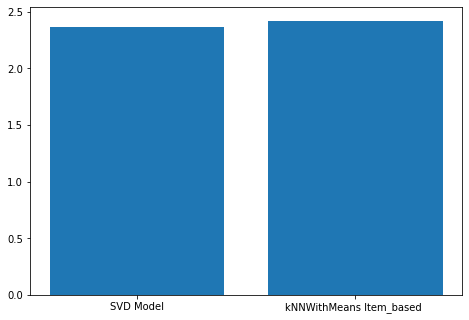

In [88]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

MODELS = ['SVD Model', 'kNNWithMeans Item_based ']
RMSE = [SVD_Model_RMSE,Item_based_RMSE]
ax.bar(MODELS,RMSE)
plt.show()